<a href="https://colab.research.google.com/github/layanbuirat/ENCS5141-INTELLIGENT-S-ENCO-COMPUTER-ENGINEERING---YSTEMS-LAB---/blob/main/exp8_leyan_buirat_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Leyan Burait 1211439
Experiment 8 - Computer Vision Examples
I'll provide each example in a separate cell format as requested, along with explanations for each task.

Example 1: Loading and Displaying an Image       


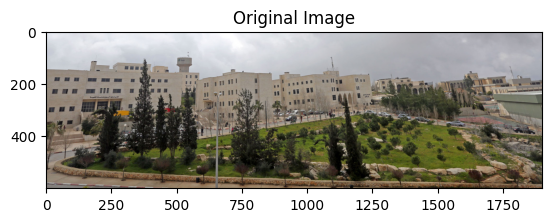

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

# Load an image
image_dir = "/kaggle/input/image-of-bzu"

# Display the image
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

Example 2: Grayscale Conversion


Available files: ['buildings.jpg']


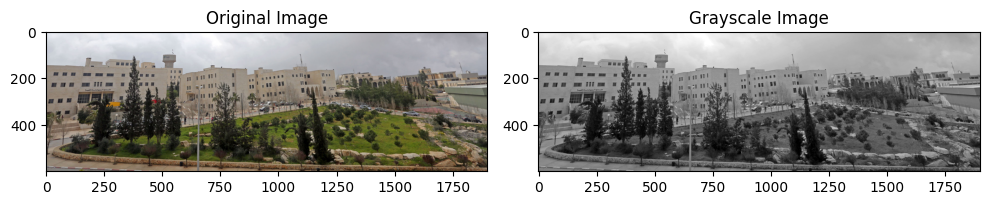

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import os

# Path to your image directory
image_dir = "/kaggle/input/image-of-bzu"

# List all files to verify the exact filename
file_list = os.listdir(image_dir)
print("Available files:", file_list)

# Use the correct filename from the list above
image_filename = file_list[0]  # Takes the first file if multiple exist
image_path = os.path.join(image_dir, image_filename)

# Load the image
image = cv.imread(image_path)

if image is None:
    print(f"Failed to load image at: {image_path}")
    print("Possible solutions:")
    print("1. Check if the filename has special characters")
    print("2. Try opening with PIL instead:")
    print("   from PIL import Image")
    print("   import numpy as np")
    print("   image = np.array(Image.open(image_path))")
else:
    # Convert to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # Display both original and grayscale
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))  # OpenCV uses BGR by default
    plt.title('Original Image')

    plt.subplot(1,2,2)
    plt.imshow(gray_image, cmap='gray')
    plt.title('Grayscale Image')

    plt.tight_layout()
    plt.show()

Example 3: Image Transformations


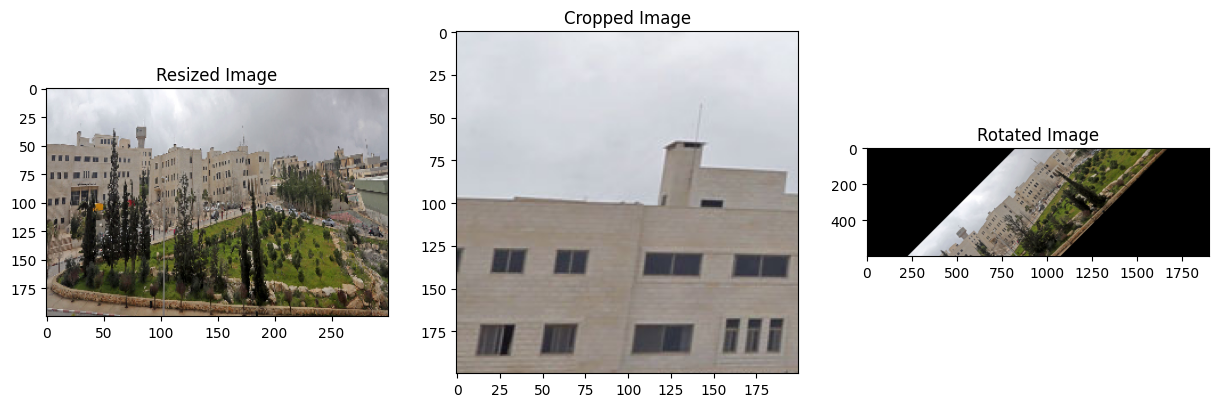

In [ ]:
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Resize and crop the image
resized_image = cv.resize(image, (300, 200))  # New width, height
cropped_image = image[50:250, 50:250]  # y-range, x-range

# Rotate the image
rows, cols = image.shape[:2]
M = cv.getRotationMatrix2D((cols/2, rows/2), 45, 1)  # Center, angle, scale
rotated_image = cv.warpAffine(image, M, (cols, rows))

# Display transformations
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(resized_image)
plt.title('Resized Image')

plt.subplot(1,3,2)
plt.imshow(cropped_image)
plt.title('Cropped Image')

plt.subplot(1,3,3)
plt.imshow(rotated_image)
plt.title('Rotated Image')
plt.show()

Explanation:

cv.resize() changes image dimensions (width, height)

Cropping uses array slicing (y-range first, then x-range)

Rotation uses affine transformation with rotation matrix

getRotationMatrix2D() creates rotation matrix around center point

warpAffine() applies the transformation

Task 4 Solution:

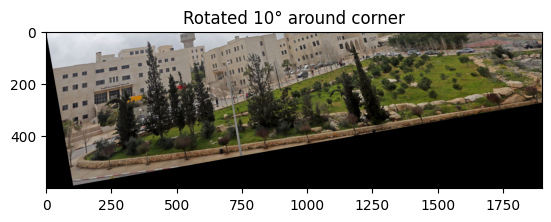

In [ ]:
M = cv.getRotationMatrix2D((0, 0), 10, 1)  # Upper-left corner, 10 degrees
rotated_corner = cv.warpAffine(image, M, (cols, rows))
plt.imshow(rotated_corner)
plt.title('Rotated 10° around corner')
plt.show()

Example 4: Gaussian Blurring


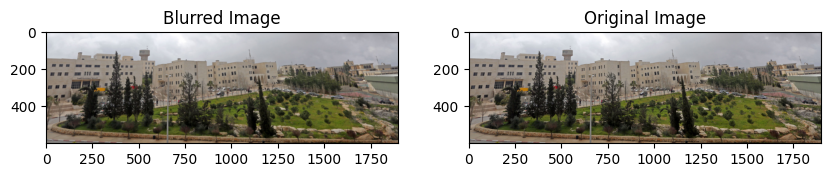

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (5,5), 0)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.subplot(1,2,2)
plt.imshow(image)
plt.title('Original Image')
plt.show()

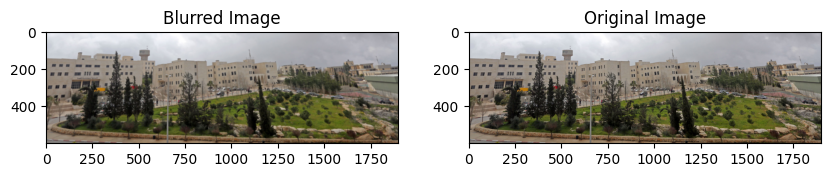

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (7,7), 0)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.subplot(1,2,2)
plt.imshow(image)
plt.title('Original Image')
plt.show()

Gaussian blur reduces noise and detail by convolving with Gaussian kernel

The (7,7) is kernel size - larger values increase blurring

The 0 is standard deviation - 0 means calculate from kernel size

Task 5 Answer:
(7,7) is the kernel size (width, height). Increasing these values makes the image more blurred as it averages over a larger area.

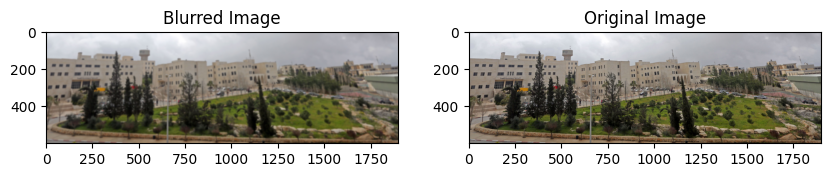

In [ ]:
# Apply Gaussian blur
blurred_image = cv.GaussianBlur(image, (15,15), 0)

# Display results
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(blurred_image)
plt.title('Blurred Image')

plt.subplot(1,2,2)
plt.imshow(image)
plt.title('Original Image')
plt.show()

Example 5: Edge Detection


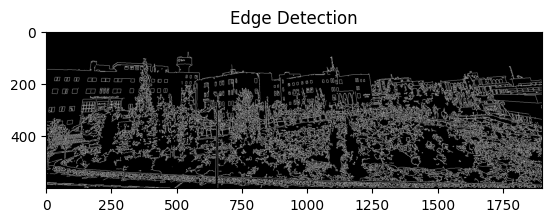

In [ ]:
# Perform edge detection using Canny
edges = cv.Canny(gray_image, 50, 150)

# Display the result
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.show()

Explanation:

Canny edge detector finds intensity gradients

First threshold (50) - weaker edges below this are discarded

Second threshold (150) - stronger edges above this are kept

Edges between thresholds are kept if connected to strong edges

Task 6 Answer:
The parameters are:

First threshold for hysteresis procedure (lower bound)

Second threshold for hysteresis procedure (upper bound)
Higher thresholds result in fewer but stronger edges, lower thresholds detect more edges but with more noise.

Example 6: Loading CIFAR10 Dataset


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load dataset
batch_size = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

100%|██████████| 170M/170M [00:02<00:00, 73.3MB/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Task 7 Answer:

transforms.ToTensor() converts PIL Image to PyTorch tensor and scales to [0,1]

transforms.Normalize() subtracts mean (0.5) and divides by std (0.5), mapping to [-1,1]

Task 8 Answer:
np.transpose(npimg, (1, 2, 0)) rearranges dimensions from (channel, height, width) to (height, width, channel) which matplotlib expects for display.

Example 7: MLP Network Definition


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3072, 64)  # 32*32*3=3072
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
net.to(device)

Net(
  (fc1): Linear(in_features=3072, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Task 9 Answer:
3072 represents the flattened input size (32x32 pixels x 3 channels). This is because CIFAR10 images are 32x32 with 3 color channels (32*32*3=3072).

In [ ]:
# Example 8: CNN Network Definition
class NetCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)    # 2x2 pooling with stride 2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Conv -> ReLU -> Pool
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net_cnn = NetCNN().to(device)

Task 10 Answer:

The network has 7 layers (2 conv, 2 pool, 3 linear)

nn.Conv2d(3,6,5) parameters: input channels, output channels, kernel size

nn.MaxPool2d(2,2) parameters: kernel size, stride

16*5*5 comes from the output dimensions after conv and pooling layers:

Input: 32x32x3

After conv1 (5x5 kernel): 28x28x6 (32-5+1=28)

After pool1 (2x2 stride 2): 14x14x6

After conv2 (5x5 kernel): 10x10x16

After pool2 (2x2 stride 2): 5x5x16

Flattened to 16*5*5=400 features

Example 9: Transfer Learning with AlexNet


In [ ]:
from torchvision import models

# Finetuning pretrained AlexNet
net_alex = models.alexnet(weights='IMAGENET1K_V1')
net_alex.classifier[6] = nn.Linear(4096, 10)  # Replace last layer
net_alex = net_alex.to(device)

# Transform for AlexNet
transform_alex = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 164MB/s]  


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models

# 1. تحضير البيانات
transform_alexnet = transforms.Compose([
    transforms.Resize(256),  # AlexNet مصممة لصور 224x224
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # متوسط وانحراف معياري لـ ImageNet
])

# تحميل بيانات CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transform_alexnet)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                      download=True, transform=transform_alexnet)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

# 2. تعريف النموذج مع التعلم بالانتقال
def create_alexnet(pretrained=True):
    model = models.alexnet(weights='IMAGENET1K_V1' if pretrained else None)

    # تجميد جميع الطبقات ما عدا الأخيرة
    if pretrained:
        for param in model.parameters():
            param.requires_grad = False

    # تعديل الطبقة الأخيرة لتناسب 10 فئات في CIFAR-10
    num_ftrs = model.classifier[6].in_features
    model.classifier[6] = nn.Linear(num_ftrs, 10)

    return model

# 3. الدوال المساعدة للتدريب والتقييم
def train_model(model, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            if i % 100 == 99:
                print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
                running_loss = 0.0
    return model

def evaluate_model(model):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on test set: {accuracy:.2f}%')
    return accuracy

# 4. تهيئة الجهاز
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 5. تدريب وتقييم النموذج مع التعلم بالانتقال
print("\n=== Training with Transfer Learning ===")
model_transfer = create_alexnet(pretrained=True).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_transfer.classifier[6].parameters(), lr=0.001, momentum=0.9)

transfer_accuracy = []
for epoch in range(5):  # عدد أقل من الحقب بسبب التعلم بالانتقال
    print(f"\nEpoch {epoch + 1}/5")
    train_model(model_transfer, criterion, optimizer, num_epochs=1)
    acc = evaluate_model(model_transfer)
    transfer_accuracy.append(acc)

# 6. تدريب وتقييم النموذج من الصفر
print("\n=== Training from Scratch ===")
model_scratch = create_alexnet(pretrained=False).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

scratch_accuracy = []
for epoch in range(10):  # عدد أكبر من الحقب للتدريب من الصفر
    print(f"\nEpoch {epoch + 1}/10")
    train_model(model_scratch, criterion, optimizer, num_epochs=1)
    acc = evaluate_model(model_scratch)
    scratch_accuracy.append(acc)

# 7. عرض النتائج المقارنة
plt.figure(figsize=(10, 5))
plt.plot(transfer_accuracy, label='Transfer Learning')
plt.plot(scratch_accuracy, label='From Scratch')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.grid()
plt.show()

# 8. تحليل النتائج
final_transfer_acc = transfer_accuracy[-1]
final_scratch_acc = scratch_accuracy[-1]
improvement = final_transfer_acc - final_scratch_acc

print("\n=== Final Results ===")
print(f"Transfer Learning Accuracy: {final_transfer_acc:.2f}%")
print(f"From Scratch Accuracy: {final_scratch_acc:.2f}%")
print(f"Improvement with Transfer Learning: {improvement:.2f}% points")

Files already downloaded and verified
Files already downloaded and verified
Using device: cuda:0

=== Training with Transfer Learning ===


Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:01<00:00, 195MB/s] 



Epoch 1/5
[Epoch 1, Batch 100] loss: 1.130
[Epoch 1, Batch 200] loss: 0.788
[Epoch 1, Batch 300] loss: 0.741
Accuracy on test set: 78.03%

Epoch 2/5
[Epoch 1, Batch 100] loss: 0.697
[Epoch 1, Batch 200] loss: 0.695
[Epoch 1, Batch 300] loss: 0.672
Accuracy on test set: 79.47%

Epoch 3/5
[Epoch 1, Batch 100] loss: 0.661
[Epoch 1, Batch 200] loss: 0.647
[Epoch 1, Batch 300] loss: 0.664
Accuracy on test set: 80.16%

Epoch 4/5
[Epoch 1, Batch 100] loss: 0.627
[Epoch 1, Batch 200] loss: 0.624
[Epoch 1, Batch 300] loss: 0.643
Accuracy on test set: 80.28%

Epoch 5/5
[Epoch 1, Batch 100] loss: 0.611
[Epoch 1, Batch 200] loss: 0.620
[Epoch 1, Batch 300] loss: 0.610
